**Sam Alim Ramadhan**

**1103210236**

**UAS**

**MNist Angka**

In [1]:
# Import modul untuk mengunduh dataset MNIST
from keras.datasets import mnist

# Mengunduh dataset MNIST dan memisahkan menjadi data_train dan data_test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Menampilkan bentuk dari array X_train, y_train, X_test,
# dan y_test yang merupakan data gambar untuk pelatihan
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


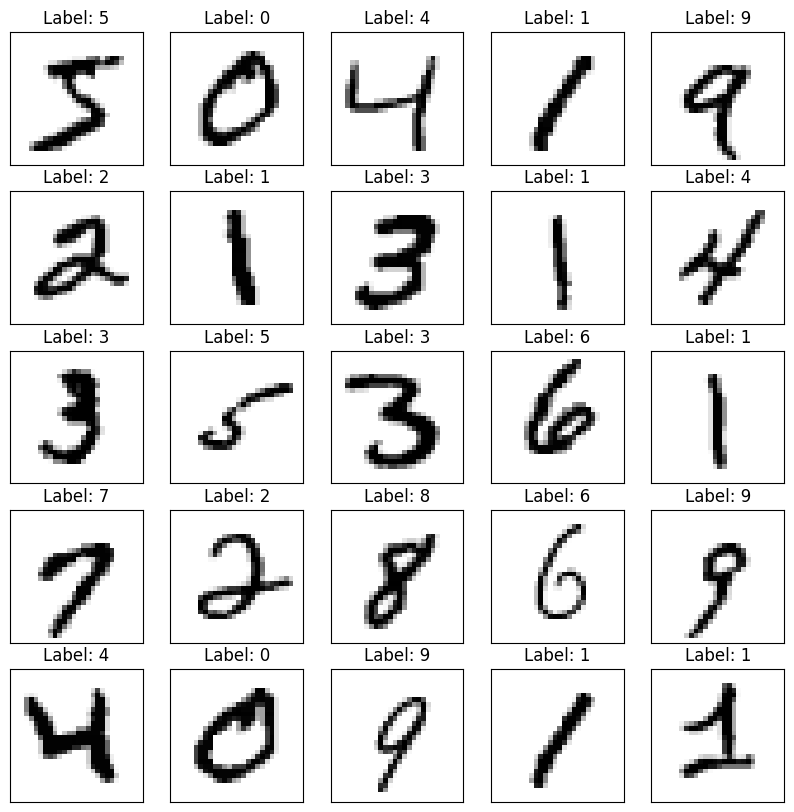

In [2]:
# Mengimpor modul pyplot dari matplotlib untuk membuat plot
import matplotlib.pyplot as plt

# Membuat sebuah figure baru dengan ukuran 10x10
plt.figure(figsize = (10, 10))

# Membuat subplots dengan 5 baris dan 5 kolom dengan iterasi dari 0 sampai 24
for i in range (25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.title(f'Label: {y_train[i]}')
  plt.grid(False)
  plt.imshow(X_train[i], cmap = plt.cm.binary)

In [3]:
# Mengimpor modul numpy untuk komputasi array
import numpy as np

# Mengubah tipe data X_train dan X_test menjadi float32, menormalkan nilainya
# antara 0 dan 1, dan menambahkan dimensi baru di akhir
X_train = np.expand_dims((X_train.astype('float32') / 255.0), axis = -1)
X_test = np.expand_dims((X_test.astype('float32') / 255.0), axis = -1)

# Menampilkan bentuk X_train dan X_test setelah diubah
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [4]:
# Mengimpor fungsi to_categorical dari keras.utils untuk konversi label
# menjadi bentuk one-hot encoding
from keras.utils import to_categorical

# Mengonversi label y_train dan y_test menjadi bentuk one-hot
# encoding dengan 10 kelas
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Menampilkan bentuk y_train dan y_test setelah diubah
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [5]:
# Mengimpor kelas Sequential dari keras.models untuk membangun model sekuensial
from keras.models import Sequential

# Mengimpor layer Dense dari keras.layers
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Input

# Mendeklarasi arsitektur model dalam bentuk daftar layer
layers = [
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
    ]

# Membuat model sekuensial dengan list layer yang telah dideklarasi sebelumnya
model = Sequential(layers)
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Menampilkan arsitektur model secara singkat
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [6]:
# Mengimpor kelas EarlyStopping dari keras.callbacks untuk menghentikan
# pelatihan lebih awal jika kinerja tidak meningkat
from keras.callbacks import EarlyStopping

# Membuat callback EarlyStopping yang memonitor 'val_loss', dengan kesabaran 3 epoch, dan
# mengembalikan bobot terbaik
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights = True)
# Melatih model dengan data pelatihan, menggunakan data pengujian untuk validasi,
# selama maksimal 50 epoch, dengan ukuran batch 128, dan menggunakan callback EarlyStopping
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50, batch_size = 128, callbacks = [early_stopping])

Epoch 1/50
469/469 [==============================] - 12s 8ms/step - loss: 0.3051 - accuracy: 0.9062 - val_loss: 0.0695 - val_accuracy: 0.9770
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0977 - accuracy: 0.9707 - val_loss: 0.0471 - val_accuracy: 0.9851
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0703 - accuracy: 0.9792 - val_loss: 0.0344 - val_accuracy: 0.9895
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0589 - accuracy: 0.9825 - val_loss: 0.0322 - val_accuracy: 0.9883
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0490 - accuracy: 0.9855 - val_loss: 0.0308 - val_accuracy: 0.9896
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0427 - accuracy: 0.9868 - val_loss: 0.0290 - val_accuracy: 0.9897
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0378 - accuracy: 0.9884 - val_loss: 0.0292 - val_accuracy: 0.9911
Epoch

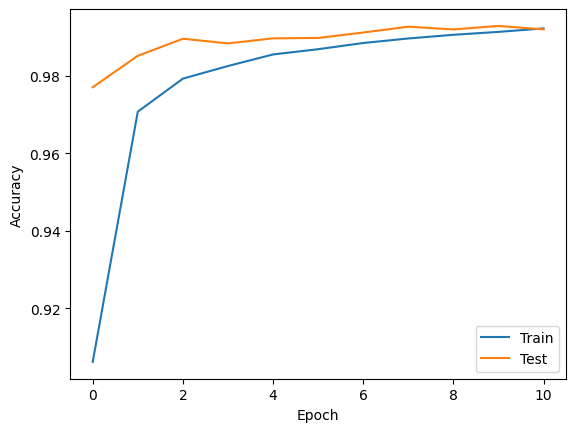

In [7]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'],loc = 'lower right')
plt.show()

In [8]:
# Menggunakan model yang telah dilatih untuk memprediksi label untuk
# data uji X_test
y_predict = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


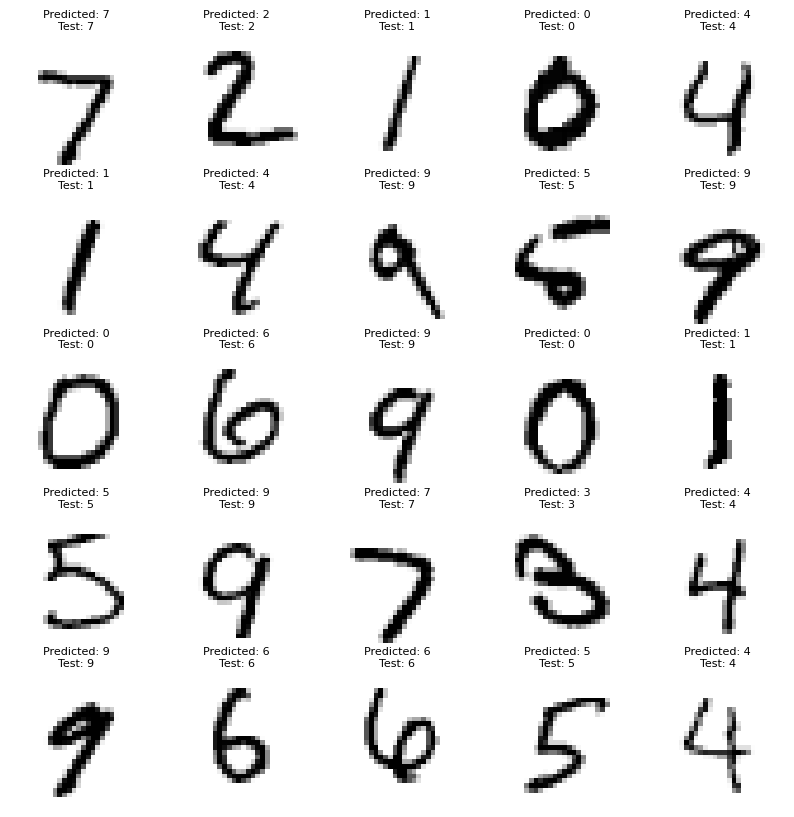

In [9]:
# Mengonversi vektor probabilitas dan test hasil prediksi menjadi label kelas
y_predict_labels = np.argmax(y_predict, axis = 1)
y_test_labels = np.argmax(y_test, axis = 1)

# Membuat sebuah figure baru dengan ukuran 10x10 dengan iterasi dari 0 sampai 24
plt.figure(figsize = (10, 10))
for i in range (25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.title(f'Predicted: {y_predict_labels[i]}\nTest: {y_test_labels[i]}', fontsize = 8)
  plt.axis('off')
  plt.imshow(X_test[i].reshape(28, 28), cmap = plt.cm.binary)


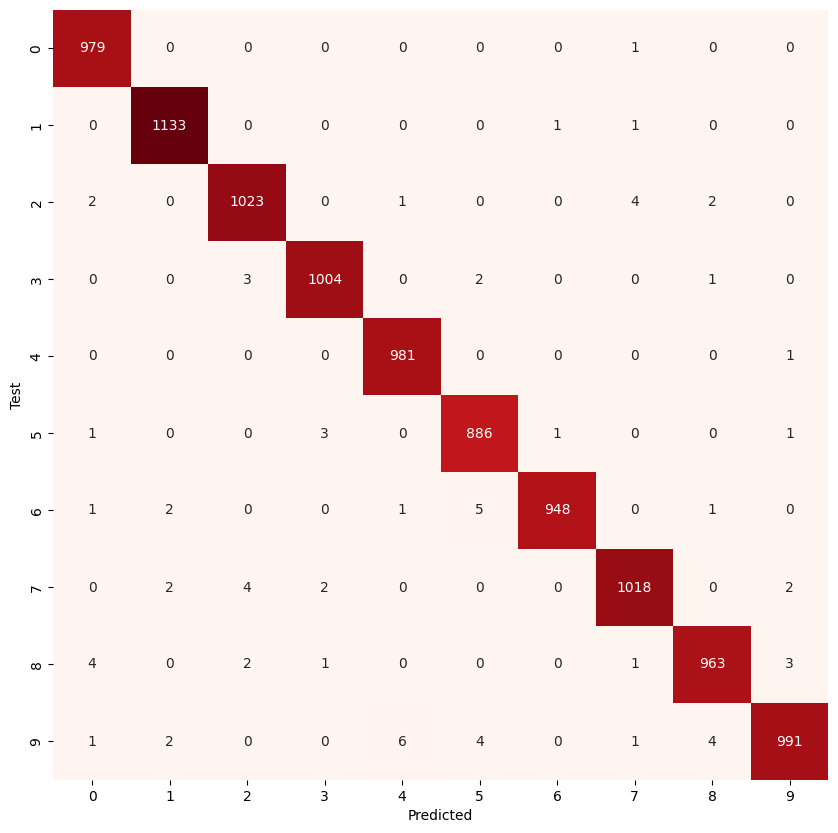



              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [11]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Menghitung matriks kebingungan dari label sebenarnya dan label prediksi
cm = confusion_matrix(y_test_labels, y_predict_labels)

# Membuat sebuah figure baru dengan ukuran 10x10
plt.figure(figsize = (10, 10))

# Membuat heatmap untuk matriks kebingungan dengan annotasi dan format integer,
# menggunakan colormap 'Red', tanpa color bar
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Reds', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('Test')
plt.show()

# Menampilkan laporan klasifikasi yang mencakup precision, recall, f1-score,
# dan support untuk setiap kelas
print("\n")
print(classification_report(y_test_labels, y_predict_labels))